In [4]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install ntscraper
!pip install vaderSentiment
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 640.0 kB/s eta 0:01:07
     --------------------------------------- 0.0/42.8 MB 435.7 kB/s eta 0:01:39
     --------------------------------------- 0.1/42.8 MB 375.8 kB/s eta 0:01:54
     --------------------------------------- 0.1/42.8 MB 508.4 kB/s eta 0:01:24
     --------------------------------------- 0.1/42.8 MB 595.3 kB/s eta 0:01:12
     --------------------------------------- 0.1/42.8 MB 605.3 kB/s eta 0:01:11
     --------------------------------------- 0.2/42.8 MB 819.2 kB/s eta 0:00:52
     --------------------------------------- 0.2/42.8 MB 860.2 kB/s eta 0:00:50
     --------------------------------------- 0.3/42.8 MB 919.0 kB/s eta 0:00:47
     ---------------------------------------- 0.5/42.8 MB 1.3 MB/s eta 0:00:33
     ---------------------------------------- 0.5/42.8 MB

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import libraries and modules
import nltk
import string
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from ntscraper import Nitter
from wordcloud import WordCloud
import seaborn as sns
import re
import numpy as np
# from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from dateutil import parser
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tayyab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
scraper = Nitter(0)

Testing instances: 100%|███████████████████████████████████████████████████████████████| 31/31 [00:50<00:00,  1.64s/it]


In [9]:
tweets = scraper.get_tweets("elonmusk", mode = 'user', number=600)

In [10]:
import pandas as pd

def process_tweets(tweets, csv_filename='TweetsData.csv'):
    final_tweets = []

    for x in tweets['tweets']:
        data = [x['link'], x['text'], x['date'], x['stats']['likes'], x['stats']['comments']]
        final_tweets.append(data)

    columns = ['Link', 'Text', 'Date', 'Likes', 'Comments']
    dataset = pd.DataFrame(final_tweets, columns=columns)

    # Save the DataFrame to a CSV file
    dataset.to_csv(csv_filename, index=False)

    return dataset

# Call the function to process tweets and save the DataFrame to a CSV file
df = process_tweets(tweets, csv_filename='TweetsData.csv')


In [11]:
df.tail()

,Link,Text,Date,Likes,Comments
595,https://twitter.com/NASAJPL/status/17128525844...,Separation confirmed! ✅ The @SpaceX rocket has...,"Oct 13, 2023 · 3:27 PM UTC",9768,469
596,https://twitter.com/elonmusk/status/1712875481...,Congrats to @NASA & @SpaceX teams for successf...,"Oct 13, 2023 · 4:58 PM UTC",69818,3485
597,https://twitter.com/elonmusk/status/1712653024...,… but others say it puts the horse before the ...,"Oct 13, 2023 · 2:14 AM UTC",194382,8589
598,https://twitter.com/elonmusk/status/1712628323...,They say it’s all about the journey …,"Oct 13, 2023 · 12:36 AM UTC",362772,8761
599,https://twitter.com/tesla_na/status/1712610140...,CyberBeer now available Cyberbeer.tesla.com,"Oct 12, 2023 · 11:24 PM UTC",7940,894


In [12]:
print('length of data is', len(df))

length of data is 600


In [13]:
df. shape

(600, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Link      600 non-null    object
 1   Text      600 non-null    object
 2   Date      600 non-null    object
 3   Likes     600 non-null    int64 
 4   Comments  600 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [15]:
df.dtypes

Link        object
Text        object
Date        object
Likes        int64
Comments     int64
dtype: object

In [16]:
df.describe()

,Likes,Comments
count,600.000000,600.000000
mean,123895.958333,8646.146667
std,138007.490816,9132.451004
min,3179.000000,36.000000
25%,30145.750000,2831.750000
50%,73486.500000,6031.500000
75%,161164.750000,10491.750000
max,898824.000000,66383.000000


In [17]:
np.sum(df.isnull().any(axis=1))

0

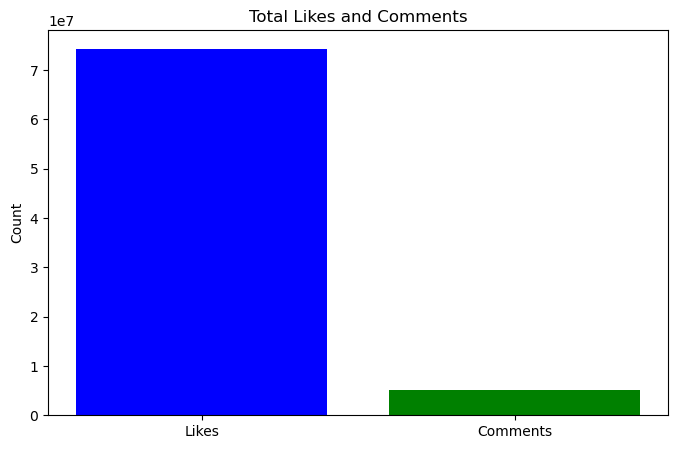

In [18]:
def plot_likes_and_comments(df):
    total_likes = df['Likes'].sum()
    total_comments = df['Comments'].sum()

    # Plotting a bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(['Likes', 'Comments'], [total_likes, total_comments], color=['blue', 'green'])
    plt.title('Total Likes and Comments')
    plt.ylabel('Count')
    plt.show()

plot_likes_and_comments(df)


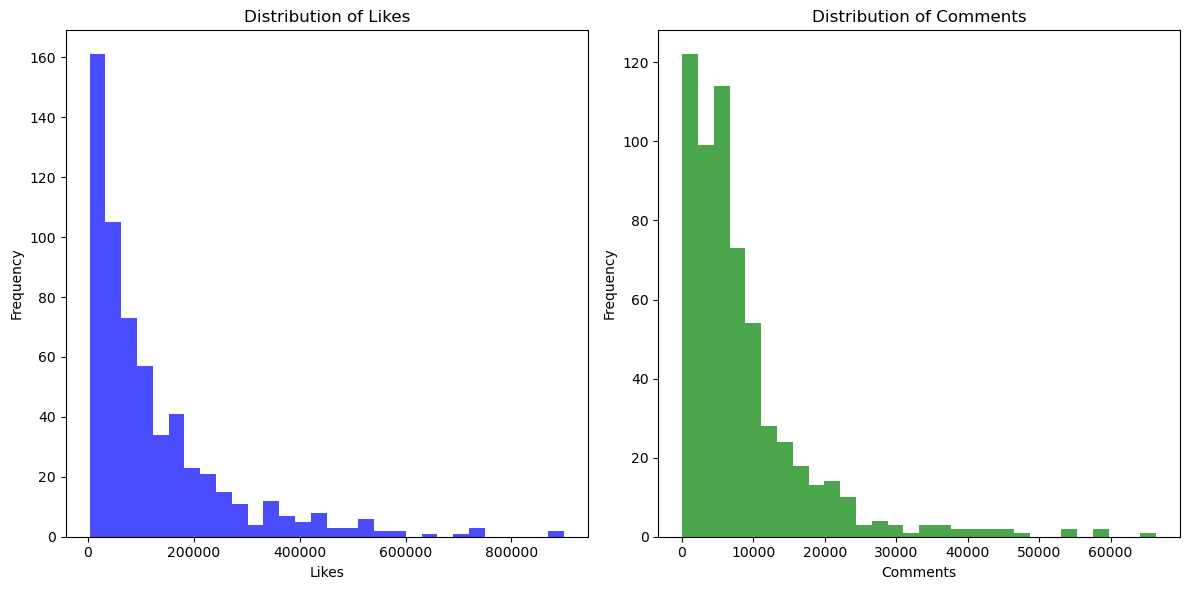

In [19]:
def plot_likes_comments_distribution(df):
    plt.figure(figsize=(12, 6))

    # Distribution of Likes
    plt.subplot(1, 2, 1)
    plt.hist(df['Likes'], bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Likes')
    plt.xlabel('Likes')
    plt.ylabel('Frequency')

    # Distribution of Comments
    plt.subplot(1, 2, 2)
    plt.hist(df['Comments'], bins=30, color='green', alpha=0.7)
    plt.title('Distribution of Comments')
    plt.xlabel('Comments')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_likes_comments_distribution(df)


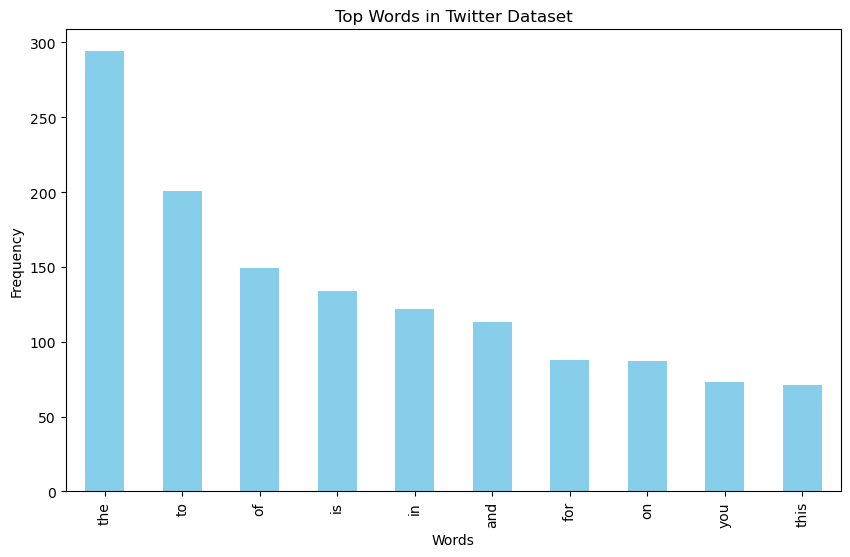

In [20]:
def plot_top_words(df, column_name='Text', top_n=10):
    # Join the preprocessed text back into a single string
    corpus = ' '.join(df[column_name].astype(str))

    # Create a CountVectorizer instance
    vectorizer = CountVectorizer()

    # Fit and transform the text data to get word frequencies
    word_freq = vectorizer.fit_transform([corpus])

    # Convert the word frequencies to a DataFrame for easier manipulation
    word_freq_df = pd.DataFrame(word_freq.toarray(), columns=vectorizer.get_feature_names_out())

    # Sum the word frequencies across all documents
    total_word_freq = word_freq_df.sum()

    # Get the top N words by frequency
    top_words = total_word_freq.nlargest(top_n)

    # Plot the top words
    plt.figure(figsize=(10, 6))
    top_words.plot(kind='bar', color='skyblue')
    plt.title('Top Words in Twitter Dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_top_words(df, column_name='Text', top_n=10)


**Data cleaning and processing**

**Text Conversion**

In [21]:
df['Text']=df['Text'].str.lower()
df['Text'].tail()

595    separation confirmed! ✅ the @spacex rocket has...
596    congrats to @nasa & @spacex teams for successf...
597    … but others say it puts the horse before the ...
598                they say it’s all about the journey …
599          cyberbeer now available cyberbeer.tesla.com
Name: Text, dtype: object

**URL Removing**

In [22]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Text'] = df['Text'].apply(lambda x: cleaning_URLs(x))
df['Text'].tail()

595    separation confirmed! ✅ the @spacex rocket has...
596    congrats to @nasa & @spacex teams for successf...
597    … but others say it puts the horse before the ...
598                they say it’s all about the journey …
599          cyberbeer now available cyberbeer.tesla.com
Name: Text, dtype: object

**StopWords Removing**

In [23]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [24]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Text'] = df['Text'].apply(lambda text: cleaning_stopwords(text))
df['Text'].tail()

595    separation confirmed! ✅ @spacex rocket demonst...
596    congrats @nasa & @spacex teams successfully la...
597             … but others say puts horse cartographer
598                                   say it’s journey …
599              cyberbeer available cyberbeer.tesla.com
Name: Text, dtype: object

**Punctuation Removing**

In [25]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['Text']= df['Text'].apply(lambda x: cleaning_punctuations(x))
df['Text'].tail()

595    separation confirmed ✅ spacex rocket demonstra...
596    congrats nasa  spacex teams successfully launc...
597             … but others say puts horse cartographer
598                                   say it’s journey …
599                cyberbeer available cyberbeerteslacom
Name: Text, dtype: object

**Repeat Words Removing**

In [26]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['Text'] = df['Text'].apply(lambda x: cleaning_repeating_char(x))
df['Text'].tail(10)

590                                                     
591                                    loving new tshirt
592                   falcon heavy side boosters landing
593          falcon heavy launching missiontopsyche nasa
594    view second stage escape burn deployment psych...
595    separation confirmed ✅ spacex rocket demonstra...
596    congrats nasa  spacex teams successfully launc...
597             … but others say puts horse cartographer
598                                   say it’s journey …
599                cyberbeer available cyberbeerteslacom
Name: Text, dtype: object

**Numbers Removing**

In [27]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Text'] = df['Text'].apply(lambda x: cleaning_numbers(x))
df['Text'].tail()

595    separation confirmed ✅ spacex rocket demonstra...
596    congrats nasa  spacex teams successfully launc...
597             … but others say puts horse cartographer
598                                   say it’s journey …
599                cyberbeer available cyberbeerteslacom
Name: Text, dtype: object

**Sentiment analysis**

In [28]:
# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Using the compound score as an overall sentiment indicator

# Apply sentiment analysis to the 'Text' column
df['Sentiment'] = df['Text'].apply(get_sentiment_scores)

# Add a new column for sentiment categories (positive, neutral, negative)
df['Sentiment_Category'] = df['Sentiment'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

# Display a sample of the results
print(df[['Text', 'Sentiment', 'Sentiment_Category']].head())


                                                Text  Sentiment  \
0  almost no one seems aware immense size lightni...     0.1761   
1                               night day difference     0.0000   
2  ignition single raptor engine flight  starship...     0.0000   
3                              cybertruck vegas loop     0.0000   
4  ending racism america not substituting one for...    -0.6249   

  Sentiment_Category  
0           positive  
1            neutral  
2            neutral  
3            neutral  
4           negative  


D:\anaconda install\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda install\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda install\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda install\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly

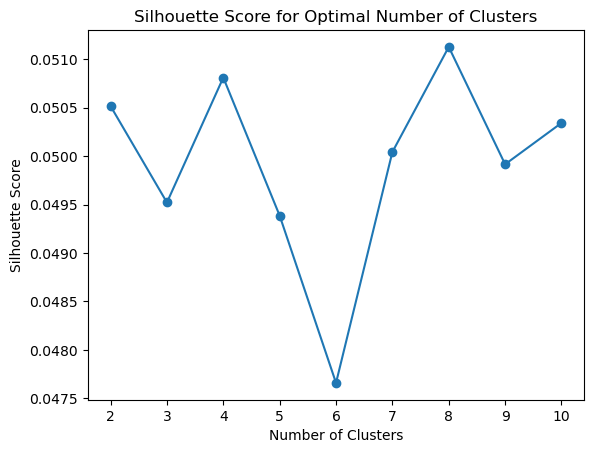

D:\anaconda install\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Tweets and Their Clusters:
                                                  Text  Cluster
0    almost no one seems aware immense size lightni...        6
1                                 night day difference        6
2    ignition single raptor engine flight  starship...        1
3                                cybertruck vegas loop        6
4    ending racism america not substituting one for...        6
..                                                 ...      ...
595  separation confirmed ✅ spacex rocket demonstra...        1
596  congrats nasa  spacex teams successfully launc...        6
597           … but others say puts horse cartographer        6
598                                 say it’s journey …        6
599              cyberbeer available cyberbeerteslacom        6

[600 rows x 2 columns]


In [29]:
def perform_kmeans_clustering(df, text_column='Text', min_clusters=2, max_clusters=10):
    # Join the preprocessed text back into a list of strings
    documents = df[text_column].tolist()

    # Use TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # Find optimal number of clusters using silhouette score
    silhouette_scores = []
    possible_clusters = range(min_clusters, max_clusters + 1)

    for n_clusters in possible_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(tfidf_matrix)
        silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.plot(possible_clusters, silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Choose the optimal number of clusters
    optimal_clusters = possible_clusters[silhouette_scores.index(max(silhouette_scores))]

    # Apply k-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

    # Display the tweets and their corresponding clusters
    print("Tweets and Their Clusters:")
    print(df[['Text', 'Cluster']])

    return df

result_df_with_clusters = perform_kmeans_clustering(df, text_column='Text', min_clusters=2, max_clusters=10)


In [30]:
def add_new_features(df, text_column='Text', likes_column='Likes', comments_column='Comments'):
    # Create a new column for tweet length
    df['Tweet_Length'] = df[text_column].apply(len)

    # Create a new column for average word length
    df['Average_Word_Length'] = df[text_column].apply(lambda x: np.mean([len(word) for word in x.split()]))

    # Create a new column for the ratio of likes to comments
    df['Likes_to_Comments_Ratio'] = df[likes_column] / df[comments_column]

    # Display the DataFrame with the new features
    print(df[['Text', 'Tweet_Length', 'Average_Word_Length', 'Likes_to_Comments_Ratio']])

    return df


result_df_with_features = add_new_features(df, text_column='Text', likes_column='Likes', comments_column='Comments')


                                                  Text  Tweet_Length  \
0    almost no one seems aware immense size lightni...           142   
1                                 night day difference            20   
2    ignition single raptor engine flight  starship...            92   
3                                cybertruck vegas loop            21   
4    ending racism america not substituting one for...            55   
..                                                 ...           ...   
595  separation confirmed ✅ spacex rocket demonstra...           193   
596  congrats nasa  spacex teams successfully launc...            93   
597           … but others say puts horse cartographer            40   
598                                 say it’s journey …            18   
599              cyberbeer available cyberbeerteslacom            37   

     Average_Word_Length  Likes_to_Comments_Ratio  
0               6.150000                 7.882052  
1               6.000000       

D:\anaconda install\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


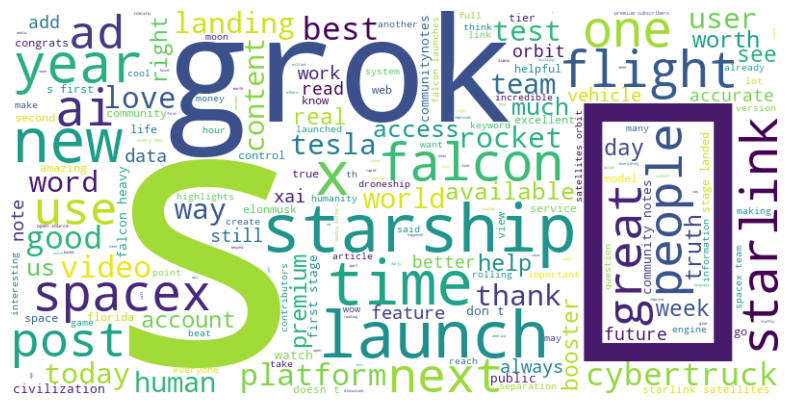

In [31]:
def plot_word_cloud(df, text_column='Text'):
    # Join the preprocessed text into a single string
    text_corpus = ' '.join(df[text_column].astype(str))

    # Generate a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


plot_word_cloud(df, text_column='Text')


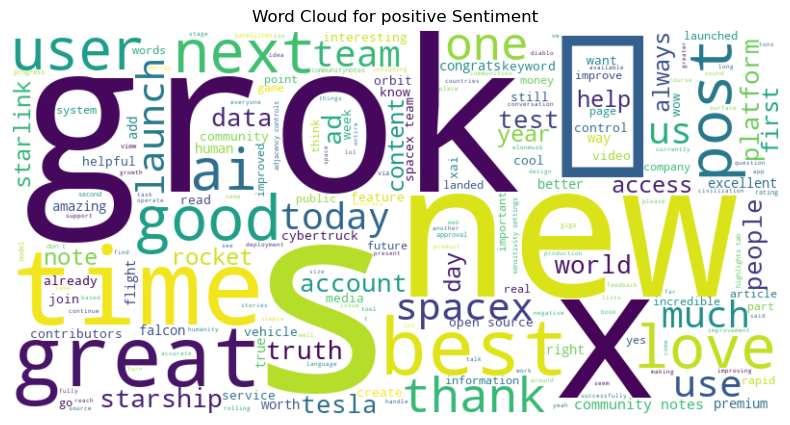

In [32]:
def positive_word_cloud(df, sentiment_category, text_column='Text', sentiment_column='Sentiment_Category'):

    # Filter the DataFrame based on a specific sentiment category
    filtered_text = df[df[sentiment_column] == sentiment_category][text_column]

    # Join the preprocessed text into a single string
    text_corpus = ' '.join(filtered_text.astype(str))

    # Generate a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category} Sentiment')
    plt.axis('off')
    plt.show()


positive_word_cloud(df, sentiment_category='positive', text_column='Text', sentiment_column='Sentiment_Category')


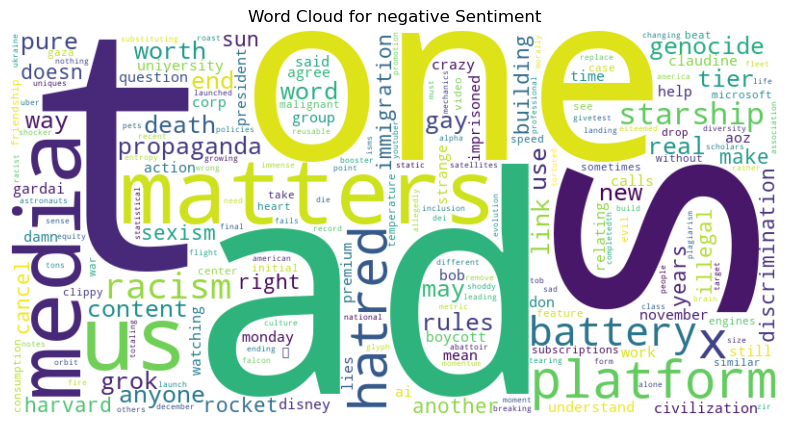

In [33]:
def negative_word_cloud(df, sentiment_category, text_column='Text', sentiment_column='Sentiment_Category'):

    # Filter the DataFrame based on a specific sentiment category
    filtered_text = df[df[sentiment_column] == sentiment_category][text_column]

    # Join the preprocessed text into a single string
    text_corpus = ' '.join(filtered_text.astype(str))

    # Generate a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category} Sentiment')
    plt.axis('off')
    plt.show()


negative_word_cloud(df, sentiment_category='negative', text_column='Text', sentiment_column='Sentiment_Category')


In [34]:
# Load pre-trained word embeddings model
nlp = spacy.load('en_core_web_md')

# Function to calculate cosine similarity between two text strings
def calculate_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return cosine_similarity(doc1.vector.reshape(1, -1), doc2.vector.reshape(1, -1))[0, 0]


for i in range(5):
    for j in range(i+1, 5):
        similarity_score = calculate_similarity(df['Text'].iloc[i], df['Text'].iloc[j])
        print(f"Similarity between tweet {i+1} and tweet {j+1}: {similarity_score}")



Similarity between tweet 1 and tweet 2: 0.483218252658844
Similarity between tweet 1 and tweet 3: 0.6474399566650391
Similarity between tweet 1 and tweet 4: 0.11997351050376892
Similarity between tweet 1 and tweet 5: 0.7786422967910767
Similarity between tweet 2 and tweet 3: 0.4942753314971924
Similarity between tweet 2 and tweet 4: 0.2586505115032196
Similarity between tweet 2 and tweet 5: 0.4738251268863678
Similarity between tweet 3 and tweet 4: 0.30470696091651917
Similarity between tweet 3 and tweet 5: 0.5841192007064819
Similarity between tweet 4 and tweet 5: 0.15038299560546875


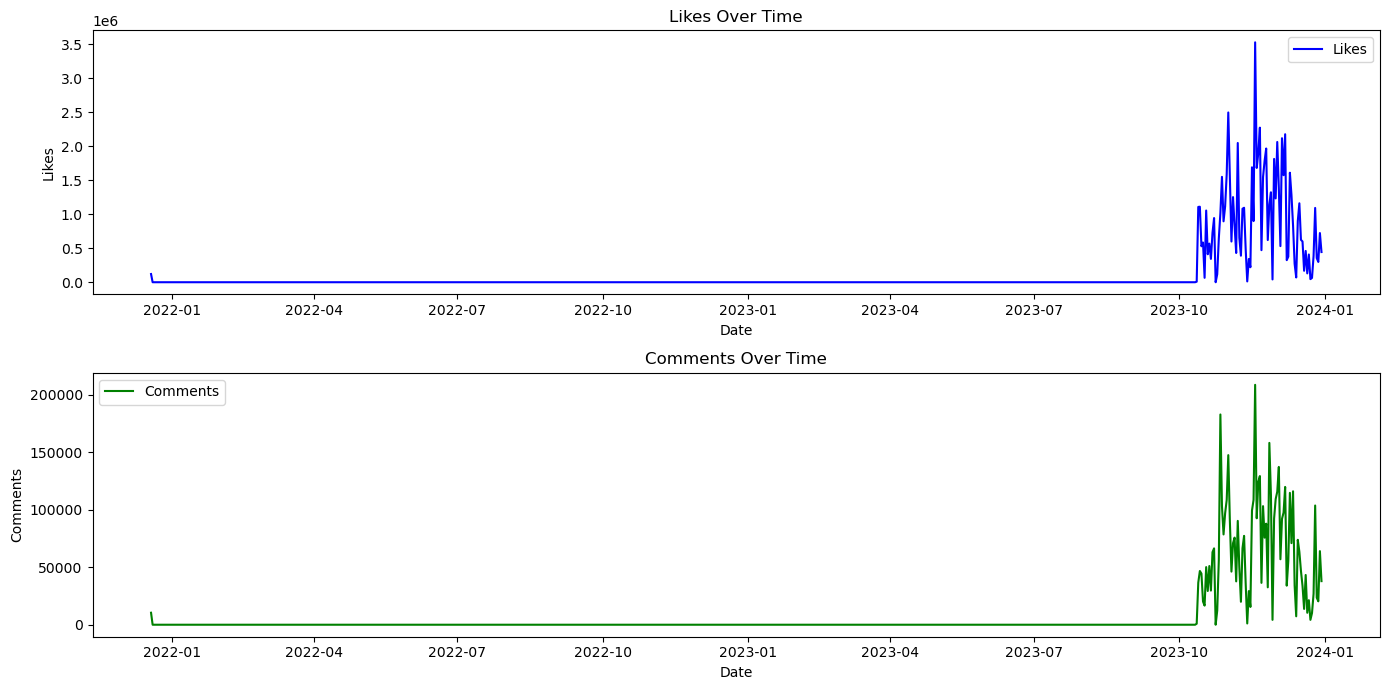

In [35]:
def plot_temporal_analysis(df, date_column='Date', likes_column='Likes', comments_column='Comments', time_frequency='D'):

    # Function to parse the custom date format
    def custom_date_parser(date_string):
        try:
            return parser.parse(date_string.replace(' · ', ' '))
        except:
            return None

    # Parse the 'Date' column with the custom format
    df[date_column] = df[date_column].apply(custom_date_parser)

    # Drop rows where the parsing failed (resulting in NaT - Not a Time)
    df = df.dropna(subset=[date_column])

    # Set 'Date' as the index for time-based analysis
    df.set_index(date_column, inplace=True)

    # Resample data to a specific time frequency
    resampled_df = df.resample(time_frequency).sum()

    # Plotting the temporal analysis
    plt.figure(figsize=(14, 7))

    # Likes over time
    plt.subplot(2, 1, 1)
    plt.plot(resampled_df[likes_column], label='Likes', color='blue')
    plt.title('Likes Over Time')
    plt.xlabel('Date')
    plt.ylabel('Likes')
    plt.legend()

    # Comments over time
    plt.subplot(2, 1, 2)
    plt.plot(resampled_df[comments_column], label='Comments', color='green')
    plt.title('Comments Over Time')
    plt.xlabel('Date')
    plt.ylabel('Comments')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_temporal_analysis(df, date_column='Date', likes_column='Likes', comments_column='Comments', time_frequency='D')


In [36]:
df.tail()

,Link,Text,Date,Likes,Comments,Sentiment,Sentiment_Category,Cluster,Tweet_Length,Average_Word_Length,Likes_to_Comments_Ratio
595,https://twitter.com/NASAJPL/status/17128525844...,separation confirmed ✅ spacex rocket demonstra...,2023-10-13 15:27:00+00:00,9768,469,0.6369,positive,1,193,7.041667,20.827292
596,https://twitter.com/elonmusk/status/1712875481...,congrats nasa spacex teams successfully launc...,2023-10-13 16:58:00+00:00,69818,3485,0.7650,positive,6,93,7.454545,20.033859
597,https://twitter.com/elonmusk/status/1712653024...,… but others say puts horse cartographer,2023-10-13 02:14:00+00:00,194382,8589,0.0000,neutral,6,40,4.857143,22.631505
598,https://twitter.com/elonmusk/status/1712628323...,say it’s journey …,2023-10-13 00:36:00+00:00,362772,8761,0.0000,neutral,6,18,3.750000,41.407602
599,https://twitter.com/tesla_na/status/1712610140...,cyberbeer available cyberbeerteslacom,2023-10-12 23:24:00+00:00,7940,894,0.0000,neutral,6,37,11.666667,8.881432


In [37]:
df.columns

Index(['Link', 'Text', 'Date', 'Likes', 'Comments', 'Sentiment',
       'Sentiment_Category', 'Cluster', 'Tweet_Length', 'Average_Word_Length',
       'Likes_to_Comments_Ratio'],
      dtype='object')